# Decision Tree Algorithm

In this section we are going to discuss a new algorithm called **Decision Tree**.Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The idea is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. 

The name Decision tree is given as it create a tree like structure taking decision to which child to pick depending on the information learned from the features.It can be understood by looking at the following diagram which is for intuitive purpose.This is simple classification whether to go to play tennis or not depending upon information we have from features. 

![image.png](dt1.png)

## Entropy

As you might infer from the diagram above if we find out the structure of the tree then it is easy to predict.For finding the optimal structure of the tree like every other algorithm we have to find some kind of loss function.Here as you can see we ask questions regarding the information from features. which feature's question comes earlier in the tree decides a lot about tree structure. if we can find out which feature to use at a given level then we can construct the tree.

Also we can think we will want to have the decisive feature or called **distinguishing features** earlier in the tree structure as it helps us to decide a lot feature in earlier stages.  
A **Distinguishing Features** is  which could uniquely identify an object, bringing together details from other groups of units of information such as identification, inscription, and condition which could in a sentence uniquely identify an object.

To find out this we use **Entropy**.Entropy is nothing but the measure of disorder. it help us to identify which feature is distinguishing depending upon the value it gives.

The Mathematical formula for Entropy is as follows -

>$\large{H(data)=-\sum_{i=1}^n p(x)\times\log_2(p(x))}$

Entropy. Sometimes also denoted using the letter ‘H’
Where ‘Pi’ is simply the  probability of an element/class ‘i’ in our data. For simplicity’s sake let’s say we only have two classes , a positive class and a negative class. So if we had a total of 100 data points in our dataset with 30 belonging to the positive class and 70 belonging to the negative class then ‘P+’ would be 3/10 and ‘P-’ would be 7/10.

If I was to calculate the entropy of my classes in this example using the formula above. Here’s what I would get.

>$\Large{-\frac{3}{10}\times\log_2(\dfrac{3}{10})-\frac{7}{10}\times\log_2(\frac{7}{10}) = 0.88}$

The entropy here is approximately 0.88. This is considered a high entropy , a high level of disorder ( meaning low level of purity). **Entropy is measured between 0 and 1**.(Depending on the number of classes in your dataset, entropy can be greater than 1 but it means the same thing , a very high level of disorder.

A high level of entropy shows that this feature is not that distinguishable. It can also be interpreted as a low value of entropy shows if divided along this attribute a majority of data will belong to one specific class.It can be shown by the following diagram

![image.png](dt2.png)

From the above shown diagram we can also conclude that **Entropy is maximum when all outcomes are equally likely** and **Entropy is minimum when only one outcome is likely**.

### Entropy For Features

For calculating Entropy for a feature we have to consider that it may have more than one distinct values. In the example taken above of going to play tennis or not, Let say for feature **Outlook** it has three distinct values-
1. sunny  
2. Rainy  
3. overcast  

The entropy of sunny, rainy and overcast can be easily calculated by above mentioned formula, But for calculating the entropy of the `Feature - Outlook` we will have to take the weighted sum of the entropy of all the distinct values that feature has taken is the data set-

> $H(F)=\sum_{i=1}^s\large{\frac{n_{S}}{n}}\times H(S)$

$s$ is the number of distinct value that feature can take in that dataset, $n_S$ is the number of points belonging to that value of the feature(S), $H(S)$ is entropy of that feature, n is the total number of data points belonging to that feature.


## Information Gain
As entropy will tell us how varied our data is, we have to find out a measure showcasing how better it will be if we were to split along a certain feature at the present level of our tree as after splitting the data also gets splitted we can calculate entropy for both the state and find the diffrence this diffrence is called `Information gain`.

Information gain is the reduction in entropy or surprise by transforming a dataset and is often used in training decision trees.Information gain is calculated by comparing the entropy of the dataset before and after a transformation.For example, we may wish to evaluate the impact on purity by splitting a dataset S by a feature F.This can be calculated as follows:

> $IG(data, F) = H(data) – H(F)$

> $IG(data, F) = H(data) – \sum_{i=1}^s\large{\frac{n_{S}}{n}}\times H(S)$

Where IG(data, F) is the information gain for the dataset **data**  if divided across the feature **F**, **H(S)** is the entropy for the dataset before any change (described above) and **H(F)** is the  entropy for the dataset given that it got splitted for distinct values of Feature **F**.And other symbol has same meaning specified above.

## Gini Impurity

Just like we calculate entropy `Gini impurity` is also one of teh methods that be used to measure the impurity of the data present at that point.The Gini impurity measure is one of the methods used in decision tree algorithms to decide the optimal split from a root node, and subsequent splits.It can be mathematically represented as-

> $\large{GI=1-\sum_{i=1}^{n}p_i^2}$

Where $p_i$ is the probability of the class i given the value for which we are calculating for, n represents the total number of class.for two class say positive(+) and negative(-) it can be representes as-

> $\large{GI=1-[p_+^2+p_-^2]}$

### Entropy vs Gini Impurity

Now we have learned about Gini Impurity and Entropy and how it actually works. Also, we have seen how we can calculate Gini Impurity/Entropy for a split/feature.  

The internal working of both methods is very similar and both are used for computing the feature/split after every new splitting. But if we compare both the methods then `Gini Impurity is more efficient than entropy in terms of computing power`. As you can see in the graph for entropy, it first increases up to 1 and then starts decreasing, but in the case of Gini impurity it only goes up to 0.5 and then it starts decreasing, hence it requires less computational power. The range of Entropy lies in between 0 to 1 and the `range of Gini Impurity lies in between 0 to 0.5`. Hence we can conclude that Gini Impurity is better as compared to entropy for computation.


Below graph shows a comparison between gini impurity and entopy with respect to the value of p. 

![image-2.png](dt3.png)

## Code Implementation

Let us now begin with the coding part of our decision tree for sake of simplicity we are gonna take the very same data with which we began our discussion *whether to go to play golf or not*.(Here we are going to decide for golf)prerequistes of the coding part is that you must be familiar with generic trees and recursion as we are going to construct a generic tree with help of recursion.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./Data/DecisionTree/data.csv", index_col="Unnamed: 0")
data.head()

,Outlook,Temperature,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes


**Let us seprate our data into features(X) and label(y)**

In [3]:
X, y = data.drop(["Play Golf"], axis=1), data["Play Golf"]

As for the tree most important thing is node so now we will make our node class every such node will store some information just like any other tree it will have a *list of it's child*,  
*The feature across which it got spllited*,  
*The data(X,y) present at that node after possible previous splits* 

Also note one thing when will the prediction will happen you want your prediction when your data has answered every question it faced in the decision tree meaning it has gone every level of your tree *Thus, prediction will happen at the leaf node*. Therefore the node will carry two more attributes a *boolean variable to identify that it is a leaf node or not* and *prediction of that node*.

In [4]:
class Node:
    def __init__(self):
        self.feature = None
        self.children = {}
        self.X = None
        self.y = None
        self.leaf = False
        self.pred = None
    
    def predict(self):
        if not self.leaf:
            raise ValueError("Prediction called at non-leaf node.")

        counts = self.y.value_counts()
        prob_yes = prob_no = 0
        if "Yes" in counts:        
            prob_yes = counts["Yes"]/counts.sum()
        if "No" in counts:
            prob_no = counts["No"]/counts.sum()

        return {"Yes": prob_yes, "No": prob_no}

Note that we have made the predict method in node class itself as every node will have it's prediction in itself.The prediction method is based upon the majority rule if more data says *Yes* at that point we give it as our prediction for that node.We return a python dictionary having the possible answer as key and their probability as value as you can see in code above.

**Now we are going to implement Our decision tree class.**  
 
 As to calculate Which feature to choose and split across a particular node we are gonna use *Information gain* value.as you you know to calculate information gain we need entropy before the split and entropy after the split.we have made to methods for this *entropy* and `*entropy_after_split*` we will choose that feature which will have maximum information gain so, we can sy that **Decision tree is a greedy algorithm technique** Now let's see the whole code and then we will discuss other methods in that.

In [5]:
class DecisionTreeCustom:
    def __init__(self):
        self.root = None
        pass
    
    @staticmethod
    def entropy(y):
        counts = y.value_counts()
        prob_yes = prob_no = 0
        if "Yes" in counts:        
            prob_yes = counts["Yes"]/counts.sum()
        if "No" in counts:
            prob_no = counts["No"]/counts.sum()
        log_yes = log_no = 0
        if prob_yes:
            log_yes = np.math.log2(prob_yes)
        if prob_no:
            log_no = np.math.log2(prob_no)

        return -(prob_yes*log_yes + prob_no * log_no)

    @staticmethod
    def entropy_after_split(feature, X, y):
        unique = X[feature].unique()
        entropy = 0
        for val in unique:
            splitted_y = y[X[feature] == val]
            weight = len(splitted_y)/len(X)
            entropy += weight*DecisionTreeCustom.entropy(splitted_y)
        
        return entropy
            
    @staticmethod
    def make_split(feature, X, y):
        unique = X[feature].unique()
        children = {}

        for val in unique:
            node = Node()
            node.X = X[X[feature] == val].drop([feature], axis=1)
            node.y = y[X[feature] == val]
            children[val] = node
        
        return children

    @staticmethod
    def make_tree(node, X, y):
        own_entropy = DecisionTreeCustom.entropy(y)
        features = X.columns
        feature_info_gains = []
        for feature in features:
            feature_info_gains.append(own_entropy - DecisionTreeCustom.entropy_after_split(feature, X, y))
        
        ix = np.argmax(feature_info_gains)

        if feature_info_gains[ix] > 0:
            node.feature = features[ix]
            node.children = DecisionTreeCustom.make_split(features[ix], X, y)
            for child in node.children.values():
                DecisionTreeCustom.make_tree(child, child.X, child.y)
            return None
        else:
            node.leaf = True
            node.y = y 
            return None

    def fit(self, X, y):
        self.root = Node()
        DecisionTreeCustom.make_tree(self.root, X, y)
        return self
    
    def predict_tree_recursive(node, X):
        if node.leaf:
            return node.predict()
        
        val = X[node.feature]
        return DecisionTreeCustom.predict_tree_recursive(node.children[val], X)

    def predict_tree(self, X):
        return DecisionTreeCustom.predict_tree_recursive(self.root, X)

    def predict(self, X):
        y_pred = []

        for row_ix in range(len(X)):
            y_pred.append(self.predict_tree(X.iloc[row_ix]))

        return y_pred


    @staticmethod
    def print_tree_recursive(node, intent):
        print(end=intent)
        if(node.leaf):
            print("Leaf->", node.predict())
        else:
            print("Feature Split->", node.feature)
            for child_name, child in node.children.items():
                print(intent, child_name, "-->", end=" ")
                DecisionTreeCustom.print_tree_recursive(child, intent+"\t")

    def print_tree(self):
        return DecisionTreeCustom.print_tree_recursive(self.root, "")

Here we are using *`make_tree`* function to construct the tree it calulates entropy before the split and then the entropy after the split for each feature and then calculates the information gain and chooses the feature with the highest value.For making the further subtree before calling itself recursively it callls *`make_split`* function to make the childrens on the basis of the all the unique value that feature can take and divide the data accordingly and then calls itself recursively for constructing further subtrees.*`fit`* function just takes the intial data that user provides intializes the root node and then called `make_tree` function.

##  Training and Predicting

In [6]:
dt = DecisionTreeCustom() #making object of the class
dt.fit(X, y)
dt.print_tree() # Recursive method to print the tree formed

## Structure of this tree might be diffrent from what was shown earlier in the diagram.

Feature Split-> Outlook
 Rainy --> 	Feature Split-> Temperature
	 Hot --> 		Leaf-> {'Yes': 0, 'No': 1.0}
	 Mild --> 		Leaf-> {'Yes': 0, 'No': 1.0}
	 Cool --> 		Leaf-> {'Yes': 1.0, 'No': 0}
 Overcast --> 	Leaf-> {'Yes': 1.0, 'No': 0}
 Sunny --> 	Feature Split-> Windy
	 False --> 		Leaf-> {'Yes': 1.0, 'No': 0}
	 True --> 		Leaf-> {'Yes': 0, 'No': 1.0}


In [7]:
# Predictions
dt.predict(X)

[{'Yes': 0, 'No': 1.0},
 {'Yes': 0, 'No': 1.0},
 {'Yes': 1.0, 'No': 0},
 {'Yes': 1.0, 'No': 0},
 {'Yes': 1.0, 'No': 0},
 {'Yes': 0, 'No': 1.0},
 {'Yes': 1.0, 'No': 0},
 {'Yes': 0, 'No': 1.0},
 {'Yes': 1.0, 'No': 0},
 {'Yes': 1.0, 'No': 0}]

let us discuss how predict method works as by calling `fit` function we have already constructed our tree now we just have to traverse the tree according to the data point given to us and then take the prediction of leaf node. *`predict`* method calls *`predict_tree`* for every data point in the given data then return the prediction list.*`predict_tree`* function calls *`predict_tree_recursive`* which traverse tree recursively by going to node then checking the feature on which that node got splitted and then call the children of that node depending upon what value of that feature our data has.whenever it reaches a leaf node it calls `node class` *`predict`* method for prediction.

## Binary Decision Tree

Above way of algorithm we just discussed and implemented forms a generic tree i.e. it can have any number of child.One more way of implement it just by making the tree a binary tree.This is calleed binary decision tree.  
A **Binary Decision Tree** is a structure based on a sequential decision process. Starting from the root, a feature is evaluated and one of the two branches is selected. This procedure is repeated until a final leaf is reached, which normally represents the classification target you’re looking for.
We split the node on the basis of one of the value of the optimal features.This can be done for bith continous and discrete features for discrete we tend to choose on *yes or no* basis and for continous features we set a threshold.Below given diagram will hepl you to understand better.

![image.png](dt4.png)

***
**Scikit learn uses binary method to contruct the decision tree** so we are going to see the scikit learn implementation of the decision tree.before that let's prepare one custom dataset and visualize it.
***

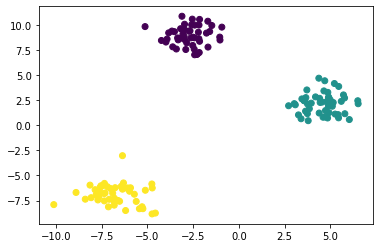

In [8]:
from sklearn.datasets import make_blobs
X, y = make_blobs(150, centers=3, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

**Training the model**

In [10]:
# Training of the model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier()

**Making Predictions**

In [16]:
Y_pred=model.predict(X)
Y_pred

array([0, 0, 2, 1, 2, 1, 0, 0, 2, 1, 2, 2, 1, 2, 1, 0, 2, 0, 1, 1, 0, 2,
       1, 2, 1, 2, 2, 0, 2, 1, 1, 0, 2, 2, 1, 1, 2, 2, 1, 0, 0, 2, 0, 0,
       1, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 2, 0, 1, 2, 0, 2, 2, 2, 1, 1, 1,
       1, 2, 1, 1, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 2, 1, 0, 0, 1,
       2, 0, 2, 0, 0, 2, 2, 1, 2, 2, 0, 1, 1, 1, 0, 0, 1, 0, 2, 1, 0, 2,
       2, 0, 1, 2, 2, 1, 2, 1, 2, 0, 2, 2, 1, 2, 0, 2, 2, 1, 1, 2, 0, 0,
       1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1])

**Calculating Accuracy**

In [17]:
(Y_pred==y).mean()

1.0

***
> scikit learn class of decision tree has many hyper-parameters that can be changed and considered in order to get our model perform better on the given dataset given to us you can learn more about these hyper parameters and thier effect on our tree from here :-
> 
> ( https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html )
***
    
## Visualizing Decision Surface

In [13]:
X_f0 = (X[:, 0].min(), X[:, 0].max())
X_f1 = (X[:, 1].min(), X[:, 1].max())
_x, _y = np.meshgrid(np.linspace(X_f0[0], X_f0[1], 50), np.linspace(X_f1[0], X_f1[1], 50))
c = model.predict(np.hstack([_x.reshape(-1,1), _y.reshape(-1,1)]))

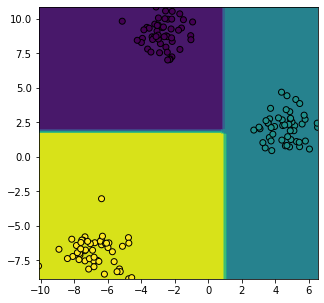

In [14]:
plt.figure(figsize=(5,5))
plt.contourf(_x, _y, c.reshape(_x.shape))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="black")
plt.show()

As you can see the decision surface here is collection of straight lines the reason for this is the division is actually done on the basis of value for example at a particular node if data has value of a feature greater than the set optimal value it is claasified in one class other wise it is classified in another class this when represented in graph wiil be straight line parallel to the feature axis. 

## Advantages of Decision Trees
 


1\. **Easy to read and interpret**

> One of the advantages of decision trees is that their outputs are easy to read and interpret without requiring statistical knowledge. For example, when using decision trees to present demographic information on customers, the marketing department staff can read and interpret the graphical representation of the data without requiring statistical knowledge.
> 
> The data can also generate important insights on the probabilities, costs, and alternatives to various strategies formulated by the marketing department.
> 
 

2\. **Easy to prepare**

> Compared to other decision techniques, decision trees take less effort for data preparation. However, users need to have ready information to create new variables with the power to predict the target variable. They can also create classifications of data without having to compute complex calculations. For complex situations, users can combine decision trees with other methods.

 

3\. **Less data cleaning required**

> Another advantage of decision trees is that there is less data cleaning required once the variables have been created. Cases of missing values and outliers have less significance on the decision tree’s data.

